## Local Real Estate

#### The local market for 'Starter Homes'. 

- The Thousand Oaks/Conejo Valley Area in Southern California. 
- **Starter Homes** are properties that are both small and affordable.

Includes
- Three years of 'Sales' data starting in September 2021 and ending August 2024.
- Zipcodes: 91301, 91320, 91360, 91361, 91362, 91377

Starter Homes are defined as:
- Less than 1400 square feet
- Limit to homes sold for **more than** 250k to eliminate abnormal/distressed listings
- Only homes sold for **less than** 1,250k to maintain a semblance of 'Affordability'

### Contents

- [Data Gathering](#Gather-The-Data-Together)
- [First Look / Filtering](#Look-At-The-Data)
- [Analysis](#Data-Analysis)
  - [Price Distribution by City](#City-Prices)
  - [Recent Year(Sept23-Aug24)](#Looking-at-the-Last-Year)
      - [Price Distribution](#Price-Distribution)
      - [Price Per SF Distribution](#Price-Per-Square-Foot)
      - [Bedrooms](#Bed-Count)
      - [Count by City](#Count-by-City)
      - [Baths](#Baths)
      - [Looking For Connections](#Look-for-Connections)
      - [Common Configurations](#Typical-Bed-Bath-Configurations)
  - [Sales Over Time(Sept21-Aug24)](#Sales-Over-Time)
  - [Count by City(Sept23-Aug24)](#Last-Three-Year-Count-by-City)

In [ ]:
[section title](#section-title)

In [ ]:
[section title](#Look-At-The-Data)

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import warnings
import datetime
import matplotlib.dates as mdates

#### Gather The Data Together

In [2]:
# file path
p = Path.cwd()
p1 = f'{p}/Comp_Crunch_Files/Aug24_Starter_Homes'
p2 = f'{p1}/Aug24_starter_'

In [3]:
# Pull the Zip codes into a list
zipcodes = [91301, 91320, 91360, 91361, 91362, 91377]

In [4]:
# Create a list of dataframes from csv files in repository
df_list = []
for i in range(len(zipcodes)):
    df = pd.read_csv(f'{p2}{zipcodes[i]}.csv')
    df_list.append(df)

df_list[0].head(2)

,address,zipCode,city,state,price,bed,bath,sqft,pricePerSf,lotArea,lotAreaType,dateSold,dateSoldNumeric,zillowUrl,latitude,longitude,homeType,zestimate,rentZestimate,imageUrl
0,"3823 Cottonwood Grove Trl, Calabasas, CA 91301",91301,Calabasas,CA,1315000,3,2.0,1355,970.48,8958.0,sqft,8/29/2024,1724914800000,https://zillow.com/homedetails/3823-Cottonwood...,34.130390,-118.709940,SINGLE_FAMILY,1315000.0,4986,https://photos.zillowstatic.com/fp/4fac927a6e5...
1,"29727 Canwood St, Agoura Hills, CA 91301",91301,Agoura Hills,CA,740000,3,3.0,1749,423.10,1121.0,sqft,8/27/2024,1724742000000,https://zillow.com/homedetails/29727-Canwood-S...,34.148308,-118.773674,TOWNHOUSE,739700.0,4308,https://photos.zillowstatic.com/fp/8de34baabc3...


In [5]:
# join together the list of dataframes
re_df = pd.concat(df_list)

re_df.shape

(1413, 20)

In [6]:
re_df.columns

Index(['address', 'zipCode', 'city', 'state', 'price', 'bed', 'bath', 'sqft',
       'pricePerSf', 'lotArea', 'lotAreaType', 'dateSold', 'dateSoldNumeric',
       'zillowUrl', 'latitude', 'longitude', 'homeType', 'zestimate',
       'rentZestimate', 'imageUrl'],
      dtype='object')

#### Look At The Data

In [7]:
# Change option setings to view url strings
pd.set_option('max_colwidth', 100)

In [8]:
# Get an overview of the Numeric Data
re_df.loc[:, ~re_df.columns.isin(['zipCode', 'dateSoldNumeric', 'latitude', 'longitude'])].describe() 

,price,bed,bath,sqft,pricePerSf,lotArea,zestimate,rentZestimate
count,1.413000e+03,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1.378000e+03,1413.000000
mean,8.114481e+05,3.013447,2.182944,1426.234961,573.228719,4961.163149,9.176498e+05,4121.100495
std,2.385105e+05,0.615398,0.510484,226.649106,154.080395,3303.199620,2.060976e+05,627.141681
min,5.000000e+02,1.000000,1.000000,755.000000,0.380000,0.250000,4.009000e+05,1783.000000
25%,7.000000e+05,3.000000,2.000000,1280.000000,503.470000,1710.000000,7.865250e+05,3740.000000
50%,8.175000e+05,3.000000,2.000000,1450.000000,571.930000,5213.000000,9.061000e+05,4096.000000
75%,9.300000e+05,3.000000,2.000000,1625.000000,649.790000,7741.000000,1.015525e+06,4426.000000
max,2.075000e+06,5.000000,4.000000,1750.000000,1421.610000,10875.000000,2.087500e+06,7022.000000


Limit the size of the homes

In [9]:
# Limit to homes less than 1400 sq ft with at least 2 bedrooms
re_df = re_df[re_df['sqft'] < 1400]

re_df.shape

(583, 20)

In [10]:
# Convert dateSold column to Datetime
re_df['dateSold'] = pd.to_datetime(re_df['dateSold'], format="%m/%d/%Y")

re_df[['dateSold','dateSoldNumeric']].sort_values('dateSold').head()

,dateSold,dateSoldNumeric
402,2021-09-07,1630998000000
138,2021-09-08,1631084400000
235,2021-09-09,1631170800000
136,2021-09-09,1631170800000
400,2021-09-09,1631170800000


In [11]:
re_df['city'].unique()

array(['Calabasas', 'Agoura Hills', 'Thousand Oaks', 'Newbury Park',
       'Westlake Village', 'Oak Park'], dtype=object)

<Axes: xlabel='price', ylabel='city'>

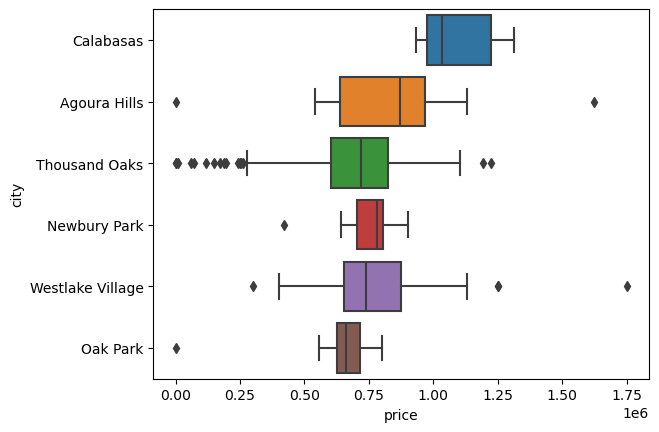

In [12]:
# Look for outliers by price
sns.boxplot(re_df, x='price', y='city')

To remove the outliers and reasonably maintain the idea of a starter home as one that is affordable, I will limit the price of the homes between 250k and 1,250k.

In [13]:
# Limit Price
re_df = re_df[re_df['price']>250000]
re_df = re_df[re_df['price']<1250000]

re_df.shape

(563, 20)

In [14]:
# Limit the timeframe from Sept21 to Aug24
re_df = re_df[re_df['dateSold']<'2024-09-01']

#### Data Analysis

#### City Prices

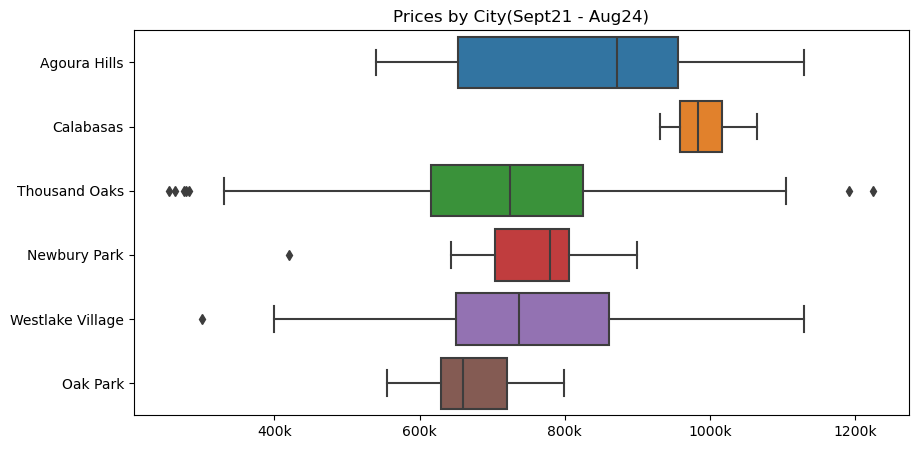

In [28]:
# Prices Distribution by City
plt.figure(figsize=(10,5))

sns.boxplot(re_df, x='price',y='city', whis=1.5)

plt.title('Prices by City(Sept21 - Aug24)')
plt.xticks(ticks=[400000,600000,800000,1000000,1200000],labels=['400k','600k','800k', '1000k', '1200k'])
plt.ylabel('')
plt.xlabel('')

plt.savefig('Images/pricebycity_last3yrs_boxplot.svg', format='svg')

In [16]:
re_df.groupby('city')['city'].count()

city
Agoura Hills         28
Calabasas             4
Newbury Park          7
Oak Park             39
Thousand Oaks       425
Westlake Village     58
Name: city, dtype: int64

#### Looking at the Last Year

#### Price Distribution

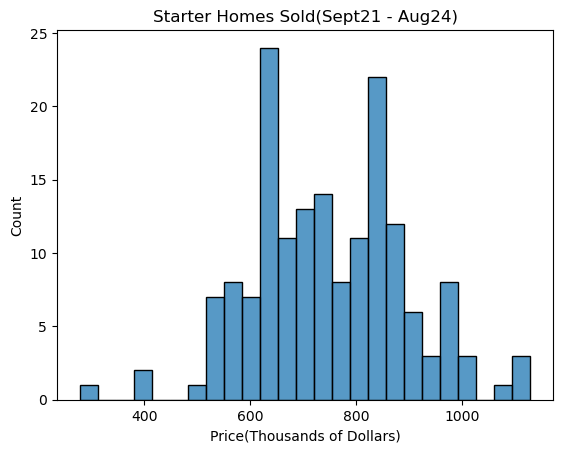

In [17]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    sns.histplot(re_df['price'][re_df['dateSold']>'2023-08-31'], bins=25)

plt.title('Starter Homes Sold(Sept21 - Aug24)')
plt.xticks(ticks = [400000, 600000, 800000, 1000000],
          labels = ['400', '600', '800', '1000'])
plt.xlabel('Price(Thousands of Dollars)')

plt.savefig('Images/starterhomesoldbyprice_last3yrs.svg', format='svg')

In [18]:
# Find the Price Range for 95% of Homes
low_price = np.quantile(a=re_df['price'], q=0.05)
high_price = np.quantile(a=re_df['price'], q=0.95)

print(f'90% of properties sold for between {low_price} and {high_price}')

90% of properties sold for between 500000.0 and 977000.0


#### Price Per Square Foot

In [20]:
re_df_recent = re_df[re_df['dateSold']>'2023-08-31']

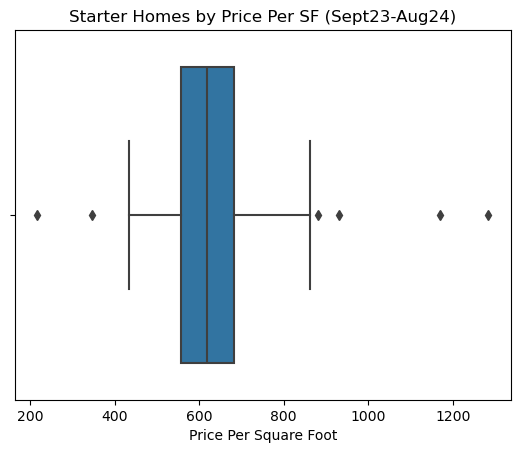

In [21]:
sns.boxplot(re_df_recent, x='pricePerSf', whis=1.5)

plt.title('Starter Homes by Price Per SF (Sept23-Aug24)')
plt.xlabel('Price Per Square Foot')

plt.savefig('Images/pricepersf_boxplot_lastyear.svg', format='svg')

#### Majority of Starter Homes are sold for \\$500 - \\$800 per square foot. With an average price of $630 per square foot.

In [22]:
# Find the range of values that encompasses 50/85% of the values in the middle of the distribution. Find mean.
range_list = [.075, .25, .75, .925]
for i in range_list:
    print(np.quantile(a=re_df_recent['pricePerSf'],q=i))

print(f"Mean Value: {np.mean(re_df_recent['pricePerSf'])}")

503.5
557.17
682.27
786.358
Mean Value: 632.2766666666668


Looking for Typical Attributes of Starter Homes  

#### Bed Count

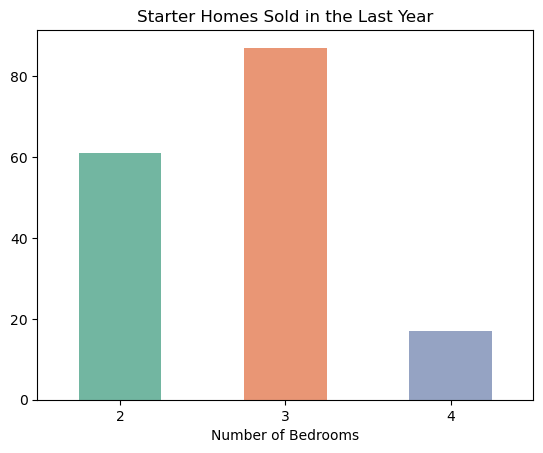

In [23]:
# Bed Count
bed_count = re_df_recent.groupby('bed').count().reset_index()

bed_count = bed_count[['bed', 'address']]
bed_count.columns = ['#beds', 'count']

ax = sns.barplot(data=bed_count, x='#beds', y='count', width=.5, palette='Set2')
ax.set_title('Starter Homes Sold in the Last Year')
ax.set_ylabel('')
ax.set_xlabel('Number of Bedrooms')

plt.savefig('Images/starterhomessold_beds.svg', format='svg')

#### Count by City

No starter homes sold in newbury park

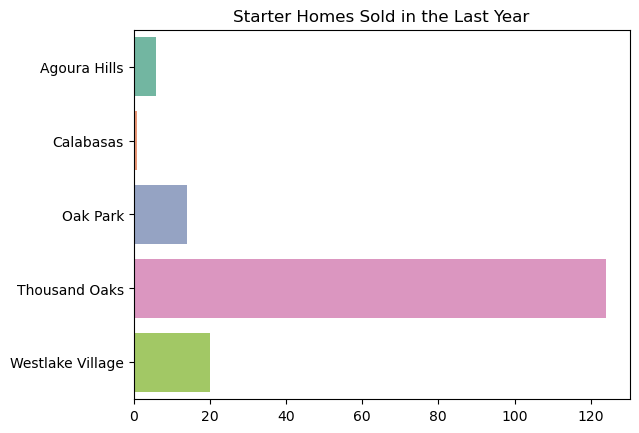

In [24]:
city_count = re_df_recent.groupby('city')['city'].count()

# city_count = city_count.reset_index()
city_count_df = pd.DataFrame()
city_count_df['city'] = city_count.index
city_count_df['count'] = city_count.unique()

ax = sns.barplot(city_count_df, x='count', y='city', palette='Set2')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Starter Homes Sold in the Last Year')

plt.savefig('Images/starterhomelocation_lastyear.svg', format='svg')

#### Baths

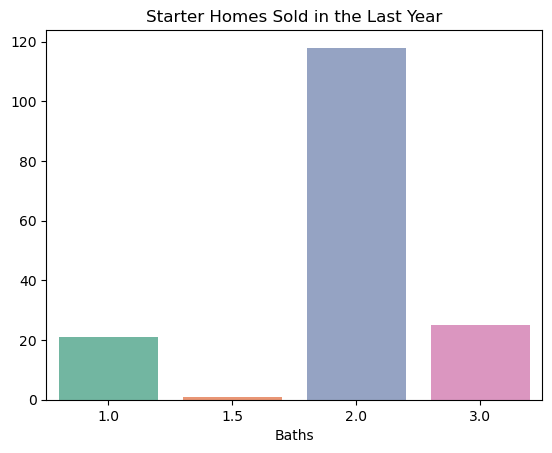

<Figure size 640x480 with 0 Axes>

In [31]:
# Baths
prop_count = re_df_recent.groupby('bath')['bath'].count()
    
# city_count = city_count.reset_index()
prop_count_df = pd.DataFrame()
prop_count_df['bath'] = prop_count.index
prop_count_df['count'] = prop_count.unique()

prop_count_df

ax = sns.barplot(prop_count_df, x='bath', y='count', palette='Set2')
ax.set_xlabel('Baths')
ax.set_ylabel('')
ax.set_title('Starter Homes Sold in the Last Year')

plt.show()

plt.savefig('Images/starterhomessold_baths.svg', format='svg')

In [30]:
re_df_recent.columns

Index(['address', 'zipCode', 'city', 'state', 'price', 'bed', 'bath', 'sqft',
       'pricePerSf', 'lotArea', 'lotAreaType', 'dateSold', 'dateSoldNumeric',
       'zillowUrl', 'latitude', 'longitude', 'homeType', 'zestimate',
       'rentZestimate', 'imageUrl'],
      dtype='object')

#### City

#### Look for Connections 

In [32]:
# Create some pair grids with the scaled numerical data
recent_snum = re_df_recent[['price','bed','bath','sqft','pricePerSf','lotArea',
       'zestimate','rentZestimate']]

recent_snum = recent_snum[recent_snum['lotArea']>749]

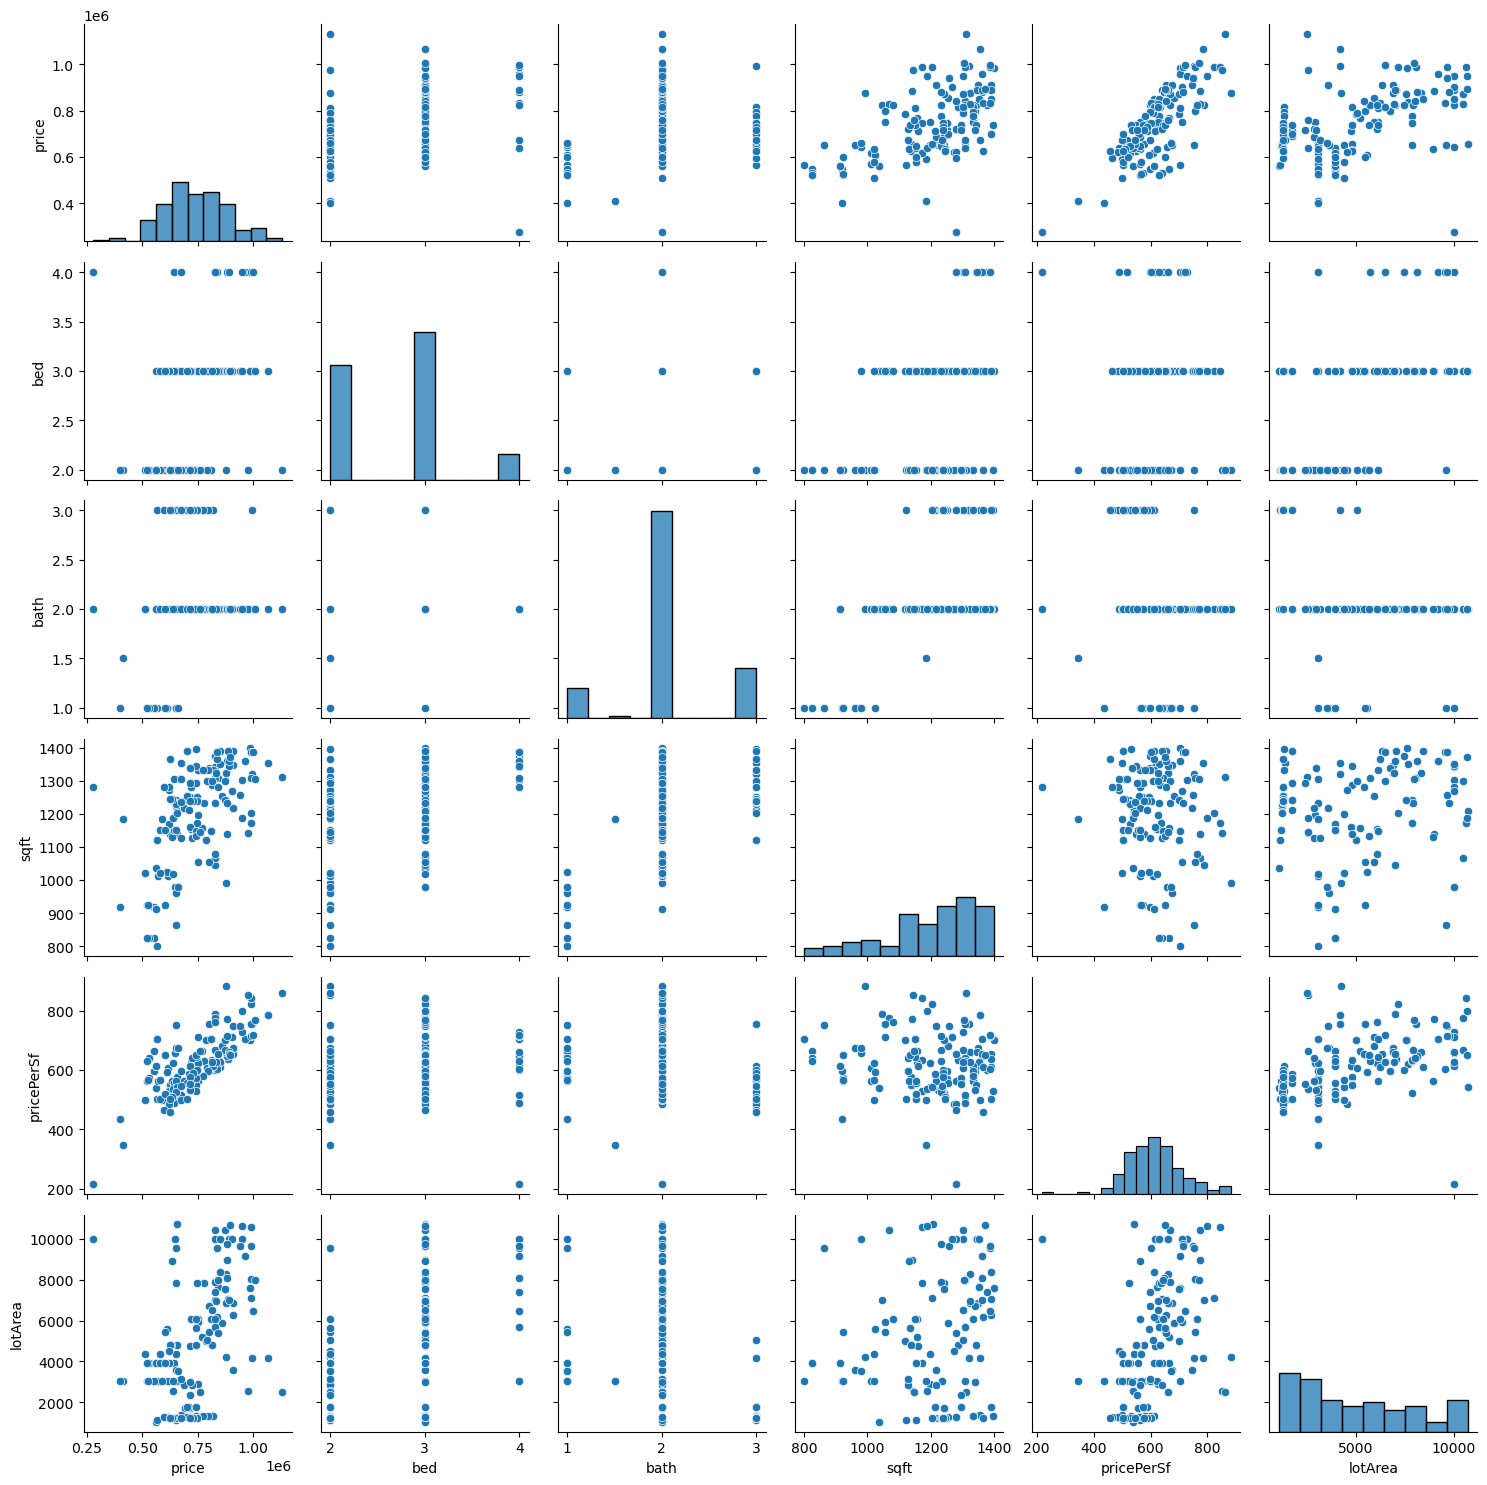

In [34]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    g = sns.PairGrid(recent_snum[['price','bed','bath','sqft','pricePerSf','lotArea']])
    g.map_diag(sns.histplot)
    g.map_offdiag(sns.scatterplot)

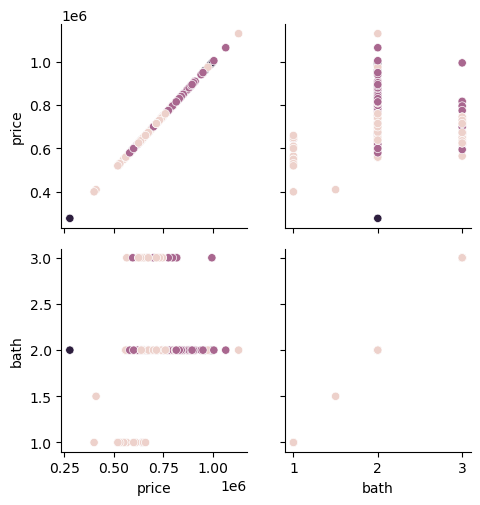

In [34]:
g = sns.PairGrid(recent_snum, vars=['price','bath'], hue='bed')
g.map(sns.scatterplot)

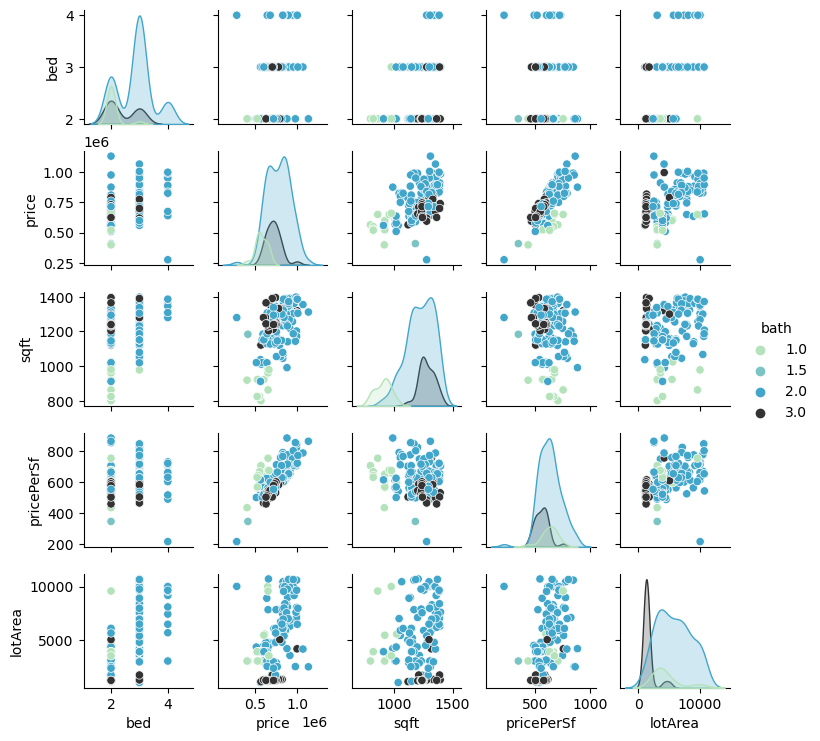

In [35]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    sns.pairplot(recent_snum[['bed','price','bath','sqft','pricePerSf','lotArea']], hue='bath', palette='GnBu_d', height=1.5)

#### Typical Bed Bath Configurations

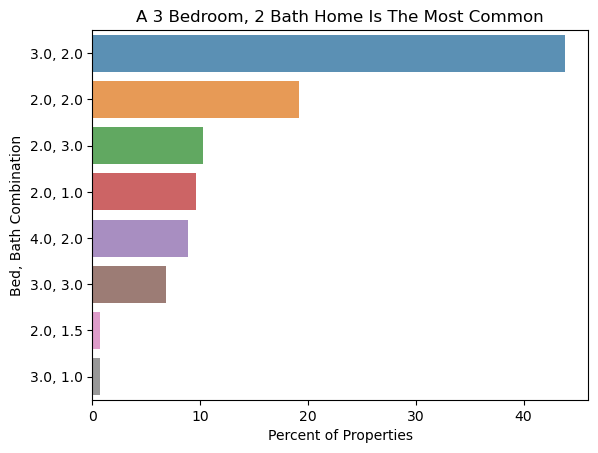

In [36]:
# Find ratio of Props for each Bed/Bath Config
df_re_config = recent_snum.groupby(['bed', 'bath']).size()/len(recent_snum)

df_re_config = df_re_config.reset_index()

# create an empty list to hold the bed/bath configurations
bed_bath_config = []

for index, row in df_re_config.iterrows():
    bed_bath_config.append(f'{row["bed"]}, {row["bath"]}')

# add a column
df_re_config['bed_bath_config'] = bed_bath_config
# rename the columns
df_re_config.columns = ['bed', 'bath', 'count_perc', 'bed_bath_config']
# sort the count by percentage
df_re_config = df_re_config.sort_values(by=['count_perc'], ascending=False)
# express as a percentage
df_re_config['count_perc'] = round(df_re_config['count_perc']*100, 1)

# Bar plot sorted by percentage
sns.barplot(data=df_re_config, y='bed_bath_config', x='count_perc', alpha=.8)
plt.title('A 3 Bedroom, 2 Bath Home Is The Most Common')
plt.ylabel('Bed, Bath Combination')
plt.xlabel('Percent of Properties')

plt.savefig('Images/mostcommonconfig_3_2.svg', format='svg')

In [52]:
re_df['dateSold'].sort_values().head()

402   2021-09-07
138   2021-09-08
136   2021-09-09
400   2021-09-09
381   2021-09-09
Name: dateSold, dtype: datetime64[ns]

#### Sales Over Time

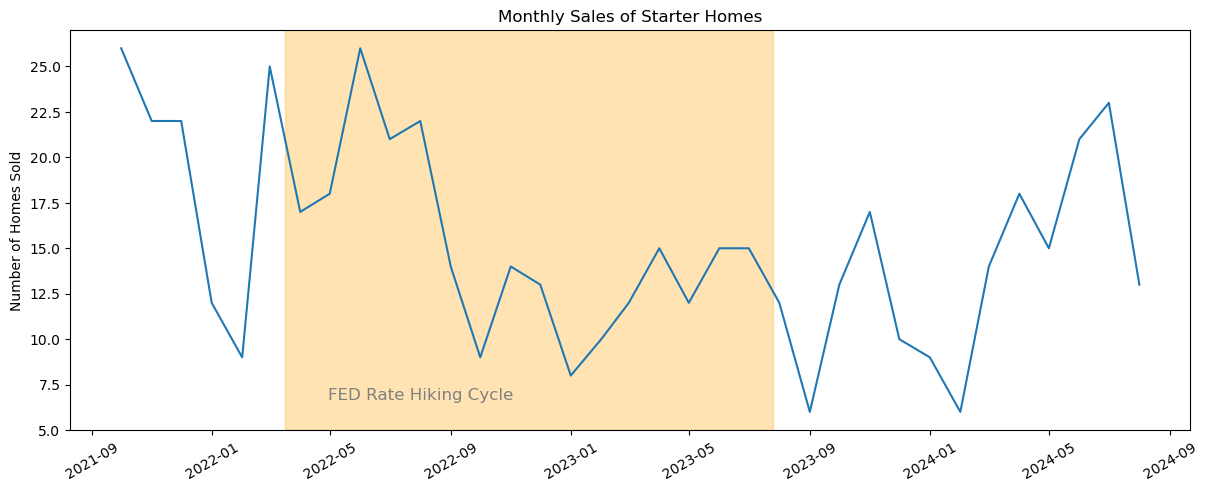

In [23]:
import datetime
import matplotlib.dates as mdates

# Using the three year time span
re_monthly_df = re_df.copy()

re_monthly_df['year'] = pd.DatetimeIndex(re_monthly_df['dateSold']).year
re_monthly_df['month'] = pd.DatetimeIndex(re_monthly_df['dateSold']).month
# count of properties sold in each month while excluding partial months
re_monthly_df = re_monthly_df.groupby(['year', 'month']).size().reset_index()[1:36]

re_monthly_df_list = []

for index, row in re_monthly_df.iterrows():
    re_monthly_df_list.append(f"{row['year']}/{row['month']}")

re_monthly_df['year_month'] = re_monthly_df_list

re_monthly_df['year_month'] = pd.to_datetime(re_monthly_df['year_month'], format="%Y/%m")
# rename columns
re_monthly_df.columns = ['year', 'month', 'count', 'year_month']

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    # Create a line graph to show monthly purchases
    fig, ax = plt.subplots(figsize=(14,5))
    ax = sns.lineplot(data=re_monthly_df, x='year_month', y='count')
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.xticks(rotation=30)
    plt.title('Monthly Sales of Starter Homes')
    plt.xlabel('')
    plt.ylabel('Number of Homes Sold')
    # Create a vertical span across the x-axis representing fed rate cycle
    ax.axvspan(mdates.date2num(datetime.datetime(2022, 3, 17)),
           mdates.date2num(datetime.datetime(2023, 7, 26)),
           color='orange', alpha=0.3, label='Rate Hiking Cycle')
    ax.text(.23, .075, 'FED Rate Hiking Cycle',
       fontsize=12, color='grey',
       transform=ax.transAxes)

plt.savefig('Images/monthlysalesstarterhomes.svg', format='svg')

#### Last Three Year Count by City

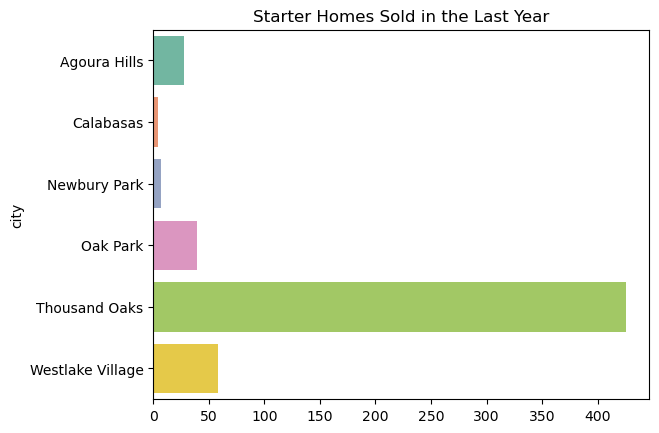

In [43]:
city_count = re_df.groupby('city')['city'].count()

# city_count = city_count.reset_index()
city_count_df = pd.DataFrame()
city_count_df['city'] = city_count.index
city_count_df['count'] = city_count.unique()

ax = sns.barplot(city_count_df, x='count', y='city', palette='Set2')
ax.set_xlabel('')
ax.set_ylabel('city')
ax.set_title('Starter Homes Sold in the Last Year')

plt.savefig('Images/starterhomelocation_last3years.svg', format='svg')